# Ciência dos Dados
## Projeto 2 - Walmart
### Integrantes do Grupo

* Antônio Amaral Egydio Martins
* Arthur Martins de Souza Barreto

### Professor Orientador
* Maria Kelly Venezuela

___

### Índice

___
### Contextualização
No contexto hodierno temos o homem como uma maquina consumidora, vivemos em mundo muito globalizado, podemos comprar qualquer coisa com alguns passos fora de casa. Nesse contexto, esse projto visa analizar as vendas da rede Walmart dos Estados Unidos, eleita a maior multinacional americana em 2010. Outra fato interessante é que em 2009 a rede foi responsável por 51% dos lucros provindos de mercearias nos EUA.

A rede tem mais de 11000 lojas, operando em mais de 27 países diferentes, com até 55 nomes diferentes. Definitivamente é uma grande potencia mundial no mercado de varejo. Nesse viés, este projeto analizará a influência dos fatores externos nas vendas da rede Walmart, e a partir deles contruir modelos de predição para os meses seguintes.

Portanto, queremos responder como esses fatores influênciam nas vendas semanais e poder predizer como as vendas se comportaram no futuro a partir dos dados coletados até o momento, a nossa base de dados.


<img src="img/walmart.jpg" width=75%>
___

### Objetivo 
Assim como supracitado, buscamos entender como o meio interno e externo impactam diretamente na quantidade de itens vendidos no WalMart nos Estados Unidos entre 5/2/2010 até 1/11/2012 (período que a base de dados abrange). Sendo assim para este projeto utilizaremos como features:

Variável | Descrição
:---:|---:
Store | ID de Reconhecimento das Lojas
Weekly_Sales | Vendas Semanais
Holiday_Flag | Variavel Booleana para Feriados 
Temperature | Temperatura Exterior as lojas (Fahrenheit)
Fuel_Price | Preço do Galão de Combustivel (USD)
CPI (Prevailing consumer price index) | Unidade utilizada para medir inflação
Unemployment | Taxa de Desemprego (%)

<center>A variável *Holiday_Flag* identifica se é feriado ou não de forma Booleana.</center>

Valor | Significado
:---:|:---:
0 | É Feriado
1 | Não é Feriado


Deste modo, queremos analizar como esses fatores influÊnciam nas vendas semanis e poder prever as vendas futuras a partir dos dados coletados. 
    
#### Sobre a base de dados:
<Br> A base de dados pode ser encontrada no seguinte link:
<Br> https://www.kaggle.com/rutuspatel/walmart-dataset-retail
<Br> O site kaggle é uma plataforma que disponibiliza muitas bases de dados, é uma ótima ferramenta para pesquisa e ter ideias para projetos interessantes. 


### Introdução
* Instalação dos modulos a serem utilizados

In [1]:
# descomente a linha a baixo para baixar o pacote skleran caso não tenha instalado ainda no seu pc
# pip install -U scikit-learn
# para mais detalhes sobre a instalação da biblioteca acesse o link a baixo:
# https://scikit-learn.org/stable/install.html

In [2]:
# importanto as bibliotecas utilizadas

%matplotlib inline
# verificação de diretorio
import os
# biblioteca de analise de banco de dados
import pandas as pd
# biblioteca auxiliar para analise dos dados
import numpy as np
# bibliotecas graficas
import matplotlib.pyplot as plt
import seaborn as sn
# bibliotecas para analize e predições
from sklearn.model_selection import train_test_split
# Modelo de regresão linear
from sklearn import linear_model
# metricas sklearn
from sklearn.metrics import mean_squared_error, r2_score
#Modelo DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
#Modelo Random Forest
from sklearn.ensemble import RandomForestRegressor
#Regressão Linear Scatter Plot
from numpy.polynomial.polynomial import polyfit

* Importando base de dados

In [3]:
#Checando Diretório 
print("Esperamos trabalhar no diretório")
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\arthu\Desktop\Documentos\Insper\2º_Periodo\Ciencia_dos_dados\Formula1


In [4]:
# lendo a base de dados e primeiras impressões
df = pd.read_csv('Walmart_Store_sales.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


Todos os dados são medias semais, ou seja, a temperatura é a média da temperatura naquela semana, bem como as vendas semanais e o restante das variáveis.
<b> <Br> Agora vamos tomar algumas medidas iniciais da base de dados, e tomar as impressões iniciais do projeto

In [5]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

Como não temos dados nulos/invalidos, podemos prosseguir com a analise da base de dados. Vejamos alguns dados básicos:

In [6]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


<Br> A linha count (contagem) não é muito informativa, pois queremos analizar o comportamento medio das variáveis, além do que não faz sentido somar uma vareável booleana (verdadeiro ou falso), o caso de Holiday_Flag.
<Br> Já a linha de média trás resultados mais interessantes, como por exemplo que neste período a taxa média de desemprego, próxima dos 8%. Também temos que a média nesses período, das vendas foi de cerca de 1 milhão de dolares, contrastando com a venda mínima, de 560 mil dolares e a venda máxima de 3.8 milhões de dolares.
<b><Br>Portante, percebemos que temos um comportamento bastante heterogêneo no nosso grupo de 45 lojas, vamos analizar mais a fundo cada situação.

<b> Iniciando a análise, primeiro vamos definir as funções utlizadas no nosso código. 

#### Funções 

In [7]:
# Função para definir o grupo dado a correlação da loja
def grupo(Data):
    # se correlação da temperatura for menor que -0.3, temos o grupo -1, correlaçãoo modera forte negativa
    if Data < -0.3:
        return -1
    # se for maior que 0.4, temos o grupo 1, correlação moderada forte positica
    elif Data > 0.3:
        return 1
    else:
        # caso contrario, temos o grupo 0, ou seja, correlação fraca, seja negativa ou positiva
        return 0

def lista_datas ():
    Dados = df.loc[df["Store"]==1,:]
    Date = Dados["Date"]
    Date.sort_values()
    return Date.tolist()

def correlacao (DataFrame,indicadores, target, store):#Criando Dicionario Principal - Será Base do Novo DataFrame de Correlações
    principal = {}
    dads = DataFrame
    for loja in range(1,46):
        #Dicionario Index
        secundario = {}
        #Separando dados de lojas individuais
        Dados = dads.loc[dads[store]==loja,:]
        for indicador in indicadores:
            #Pegando Dados de Indicadores escolhidos da Loja Inputada e adicionando ao Index
            corr = Dados[target].corr(Dados[indicador])
            secundario[indicador] = corr
        principal[loja] = secundario
    X_Data = pd.DataFrame.from_dict(principal).transpose()
    return X_Data

def dados_grafico_holiday_flag_data(DataFrame):
    #Separando Dados Para Plot de Weekly Sales e Holiday Flag
    DFhf = DataFrame.loc[DataFrame["Store"]==1,:]
    data_2010_2011 = DFhf.loc[DFhf["Date"] <= "2010-10-02"]
    data_2010_2011 = DFhf.loc[DFhf["Date"] >= "2011-07-01"].sort_values(by="Date")
    data_2011_2012 = DFhf.loc[DFhf["Date"] <= "2011-10-7"]
    data_2011_2012 = DFhf.loc[DFhf["Date"] >= "2012-01-27"].sort_values(by="Date")
    #Definindo Listas
    B2 = []
    B2T = []
    B = []
    BT = []
    L_Index = data_2010_2011["Weekly_Sales"].index
    L_Index2 = data_2011_2012["Weekly_Sales"].index
    #Utilizando For e If para reconhecer os pontos em que Holiday Flag = 1.
    for e in L_Index:
        if data_2010_2011["Holiday_Flag"][e] == 1:
            B.append(data_2010_2011["Weekly_Sales"][e])
            BT.append(data_2010_2011["Date"][e])

    for e in L_Index2:
        if data_2011_2012["Holiday_Flag"][e] == 1:
            B2.append(data_2011_2012["Weekly_Sales"][e])
            B2T.append(data_2011_2012["Date"][e])
    return B2, B2T, B, BT, data_2010_2011["Date"], data_2011_2012["Date"], data_2010_2011["Weekly_Sales"], data_2011_2012["Weekly_Sales"]

def dados_grafico_hf(DataFrame):
        #Separando Dados Para Plot de Weekly Sales e Holiday Flag
    DFhf = DataFrame.loc[DataFrame["Store"]==1,:]
    DFhf = dft.sort_values(by="Date")
    #Definindo Listas
    B = []
    BT = []
    L_Index = DFhf["Weekly_Sales"].index
    #Utilizando For e If para reconhecer os pontos em que Holiday Flag = 1.
    for e in L_Index:
        if DFhf["Holiday_Flag"][e] == 1:
            B.append(DFhf["Weekly_Sales"][e])
            BT.append(DFhf["Date"][e])
            
    return B, BT

def variavel_baixa (DataFrame, feature):
    #Definindo DataFrame recebico
    DFpreco = DataFrame
    #Banco de Variaveis
    loja_menor = 1e10
    ID_menor = 0
    loja_maior = 0
    ID_maior = 0
    #Index - Reconhecimento das posições
    Index = DFpreco[feature].index
    for e in Index:
        if DFpreco[feature][e] > loja_maior:
            loja_maior = DFpreco[feature][e]
            ID_maior = DFpreco["Store"][e]
        if DFpreco[feature][e] < loja_menor:
            loja_menor = DFpreco[feature][e]
            ID_menor = DFpreco["Store"][e]
    lojas = []
    lojas.append(ID_menor)
    lojas.append(ID_maior)
    menor_variavel = []
    maior_variavel = []
    porcentagem = []
    for loja in lojas:
        Dados = DFpreco.loc[DFpreco["Store"]==loja,:]
        minimo = Dados[feature].min()
        maximo = Dados[feature].max()
        menor_variavel.append(minimo)
        maior_variavel.append(maximo)
        porcentagem.append((maximo/minimo)*100)
   
    #Lojas Menor = [0] e Maior = [1]
    return lojas, porcentagem

### Analise Exploratória

Após o termico do carregamento da base de dados, e a checagem da integridade dos dados que serão utilizados. Haverá o inicio da Analise Exploratoria que terá foco inicial em apresentar informações básicas sobre as Features e Target utilizadas.

#### Target:
    - Weekly Sales
#### Features:
    - Holiday Flag
    - Temperature
    - Fuel Price
    - CPI
    - Unemployment
    
___

#### Visualização Gráfica

Nesta Seção será realizado o Plot de Gráficos Temporais e Correlacionais, para estabelecer a apresentação visual dos dados com relação ao tempo, e já pré-definir correlações entre os mesmos.

As <b>Features</b> usadas serão:
* `Temperature`
* `Fuel_Price`
* `CPI`
* `Unemployment`

E da Variavel principal <b>Target</b>:
* `Weekly_Sales`

`Gráficos Temporais`

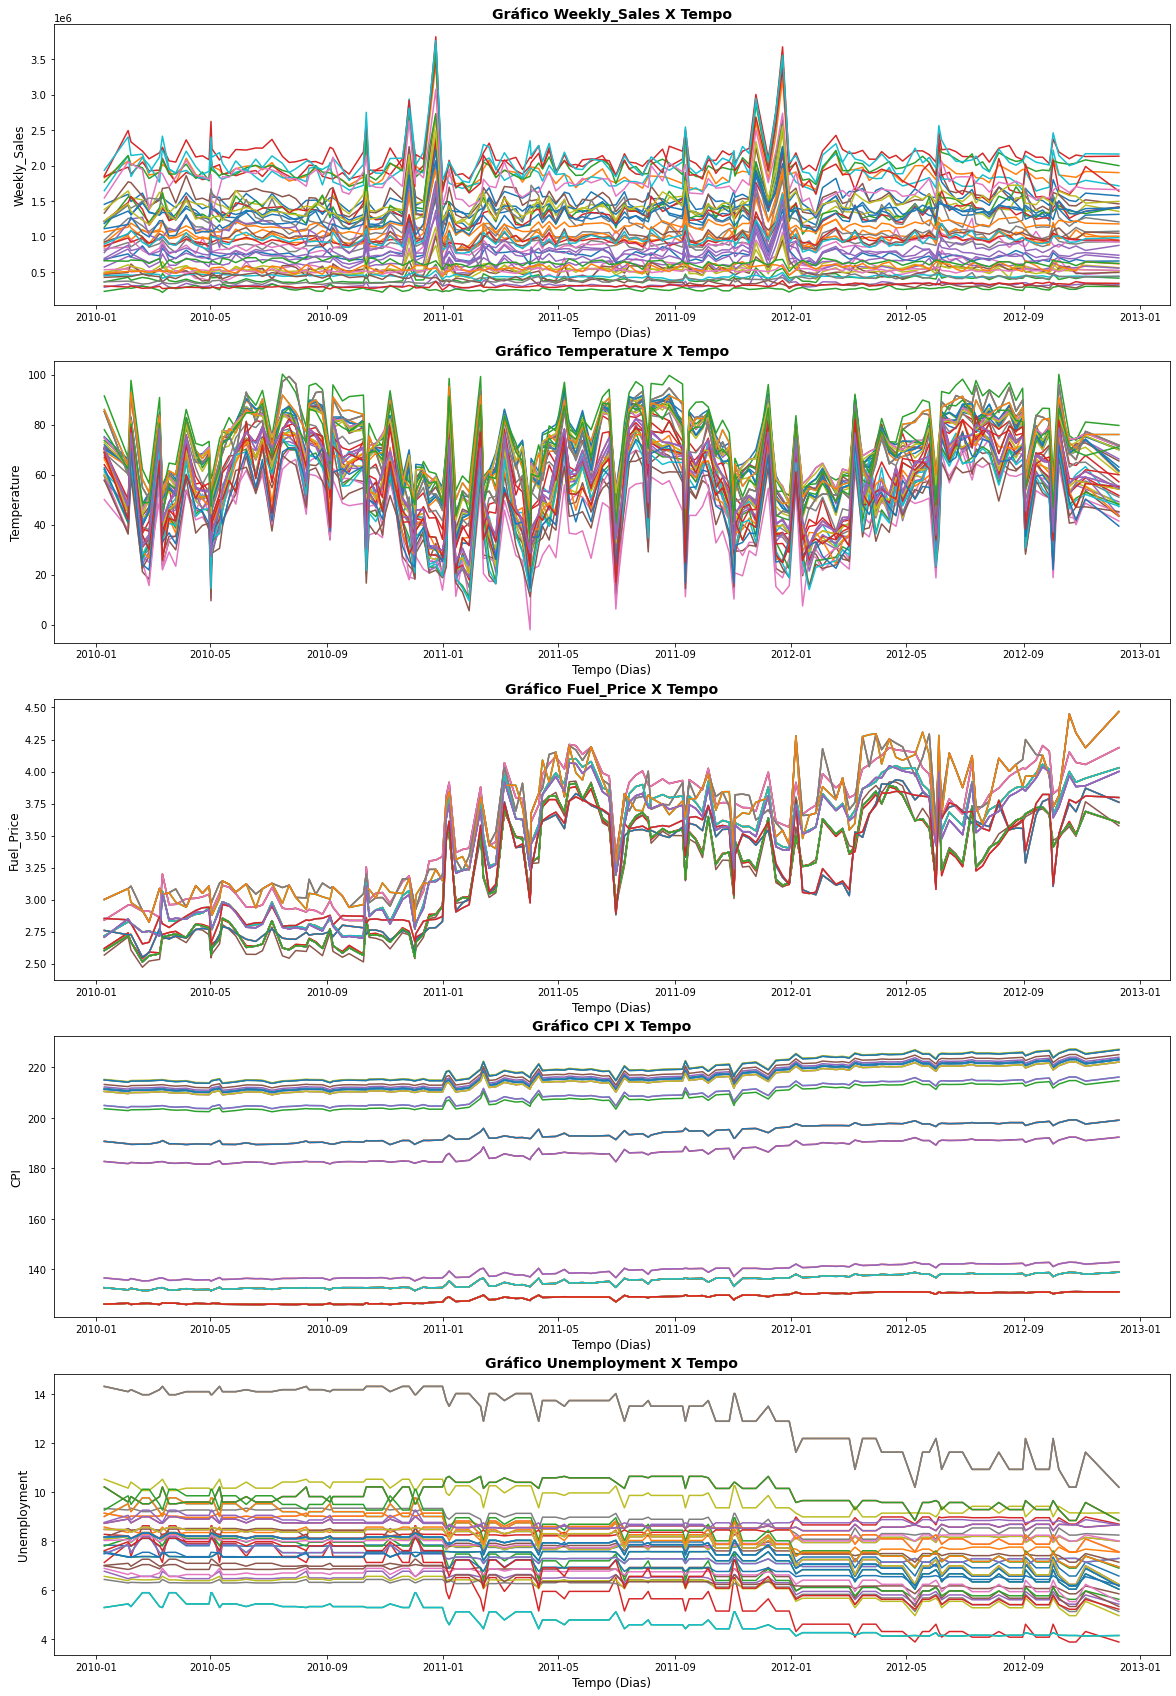

In [8]:
dft = df.copy()
dft.Date = pd.to_datetime(dft.Date)
dft_ordenado = dft.sort_values(by='Date')
l_variaveis = ["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment"]
l_subplots = [511,512,513,514,515]
plt.figure(figsize = (20,30))

index = 0
for variavel in l_variaveis:
    plt.subplot(l_subplots[index])
    for loja in range(1,46):
        dados_loja = dft_ordenado.loc[dft['Store'] == loja]
        plt.plot(dados_loja.Date, dados_loja[variavel])
        plt.title(f"Gráfico {variavel} X Tempo", fontsize= 14, fontweight = 600)
        plt.ylabel(variavel, fontsize=12)
        plt.xlabel("Tempo (Dias)", fontsize=12)
    index += 1
plt.show()

___
`Interpretação Gráficos Temporais`

* Weekly_Sales

O gráfico temporal da Target apresenta relação cíclica dos dados, uma vez que existem grandes quedas nos primeiros meses do ano, e grandes altas ao final do ano. Para saber se essas altas e quedas são causadas por eventos especiais ou feriados, segue gráfico abaixo:

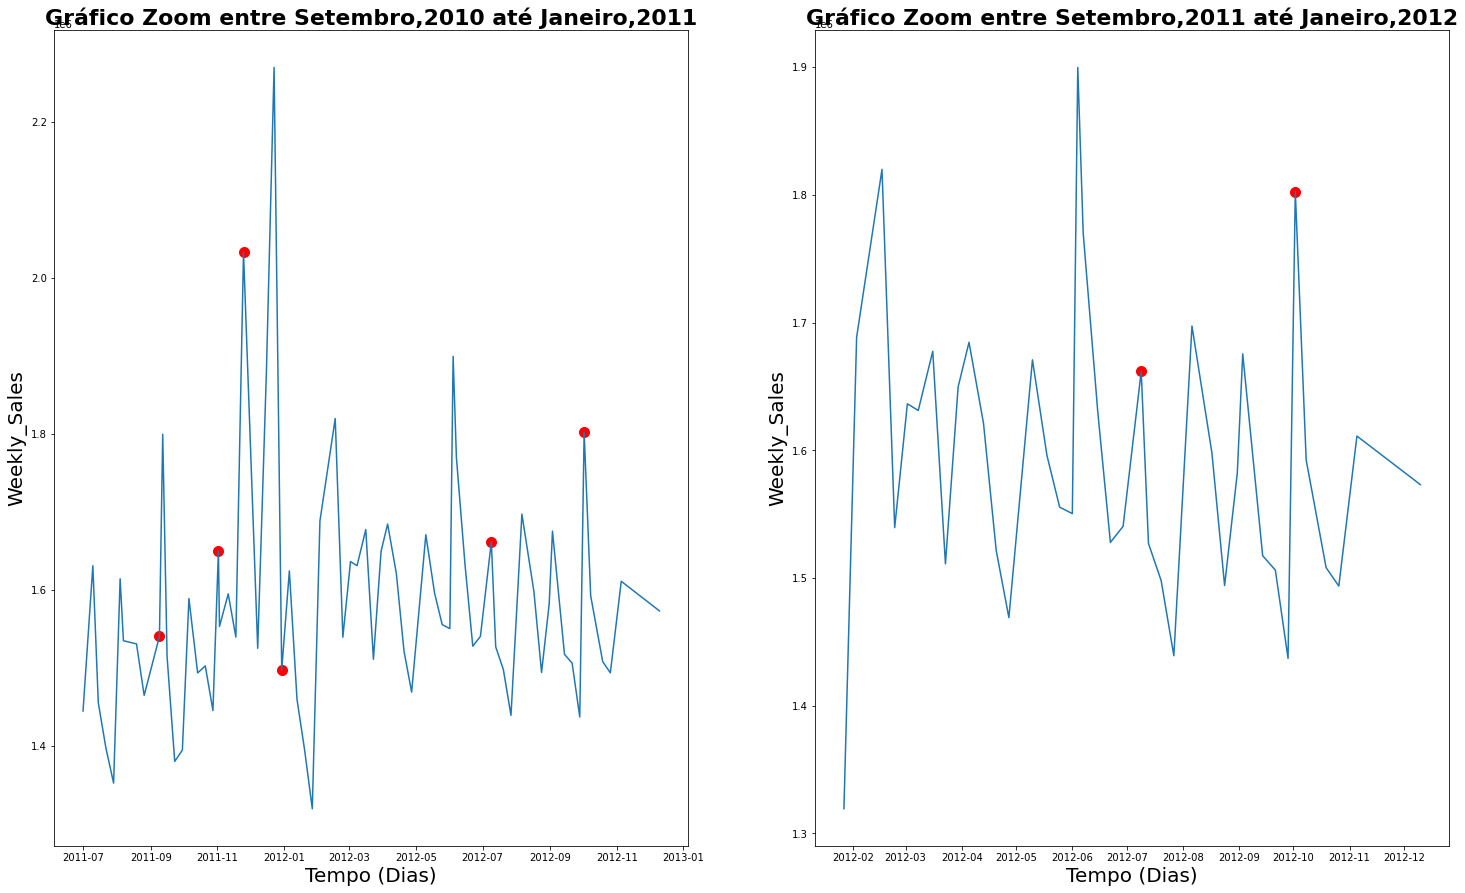

In [9]:
B2, B2T, B, BT, Data_2010, Data_2011, Vendas_2010, Vendas_2011 = dados_grafico_holiday_flag_data(dft)
#Plot Gráfico
plt.figure(figsize=(25,15))
plt.subplot(121)
plt.plot()
plt.scatter(BT, B, c="red",s=100)
plt.plot(Data_2010,Vendas_2010)
plt.xlabel("Tempo (Dias)", fontsize=20)
plt.ylabel("Weekly_Sales", fontsize=20)
plt.title("Gráfico Zoom entre Setembro,2010 até Janeiro,2011", fontsize= 22, fontweight = 600)
plt.subplot(122)
plt.scatter(B2T, B2, c="red",s=100)
plt.plot(Data_2011,Vendas_2011)
plt.xlabel("Tempo (Dias)", fontsize=20)
plt.ylabel("Weekly_Sales", fontsize=20)
plt.title("Gráfico Zoom entre Setembro,2011 até Janeiro,2012", fontsize= 22, fontweight = 600)
plt.show()

Para a facção deste gráfico foi escolhida a primeira loja da lista de lojas, representada pelo ID 1 - esta escolha foi realizada com merito totalmente explicativo, deixando o gráfico simples, e apresentando a relação que a feature holiday_flag pode ter com o aumento ou decressimo de vendas semanais. Como é possível observar no caso da loja 1 não é possível conectar a existencia de eventos especiais ou feriados com o aumento das vendas ao final dos anos.

* Temperature

Não é possível retirar conclusões diretas do gráfico temporal da feature “Temperature”, uma vez que aparenta apresentar comportamento cíclico, porém com altas e quedas extremamente agudas, e não periódicas.

* Fuel_Price

O gráfico temporal da feature “Fuel_Price” apresenta relação de crescimento conforme o tempo, sendo este crescimento de 62,83% para a loja com Fuel_Price inicial mais baixo e 63,227% para a loja com o preço inicial mais alto. Podendo haver quedas cíclicas, mas que não serão aprofundadas neste trabalho uma vez que essas varianças não podem ser justificadas por movimento inflacionário.

In [10]:
lojas, porcentagens = variavel_baixa(dft,"Fuel_Price")
print(f"A loja com Fuel_Price inicial mais baixo foi a {lojas[0]} tendo crescimento de {porcentagens[0]-100:.3f}%")
print(f"A loja com Fuel_Price inicial mais alto foi a {lojas[1]} tendo crescimento de {porcentagens[1]-100:.3f}%")
#Loja com Preço Final mais Alto

A loja com Fuel_Price inicial mais baixo foi a 36 tendo crescimento de 59.142%
A loja com Fuel_Price inicial mais alto foi a 10 tendo crescimento de 58.159%


* CPI

O Gráfico temporal da feature “CPI” apresenta relação de crescimento conforme o tempo, sendo o mesmo:

In [11]:
lojas, porcentagens = variavel_baixa(dft,"CPI")
print(f"A loja com CPI inicial mais baixo foi a {lojas[0]} tendo crescimento de {porcentagens[0]-100:.3f}%")
print(f"A loja com CPI inicial mais alto foi a {lojas[1]} tendo crescimento de {porcentagens[1]-100:.3f}%")

A loja com CPI inicial mais baixo foi a 4 tendo crescimento de 4.069%
A loja com CPI inicial mais alto foi a 9 tendo crescimento de 6.260%


* Unemployment

O gráfico temporal da feature “Unemployment” apresenta uma relação de decréscimo conforme o tempo, sendo esta movimentação de % para a loja e % para a loja.

___
`Gráficos de Correlação`

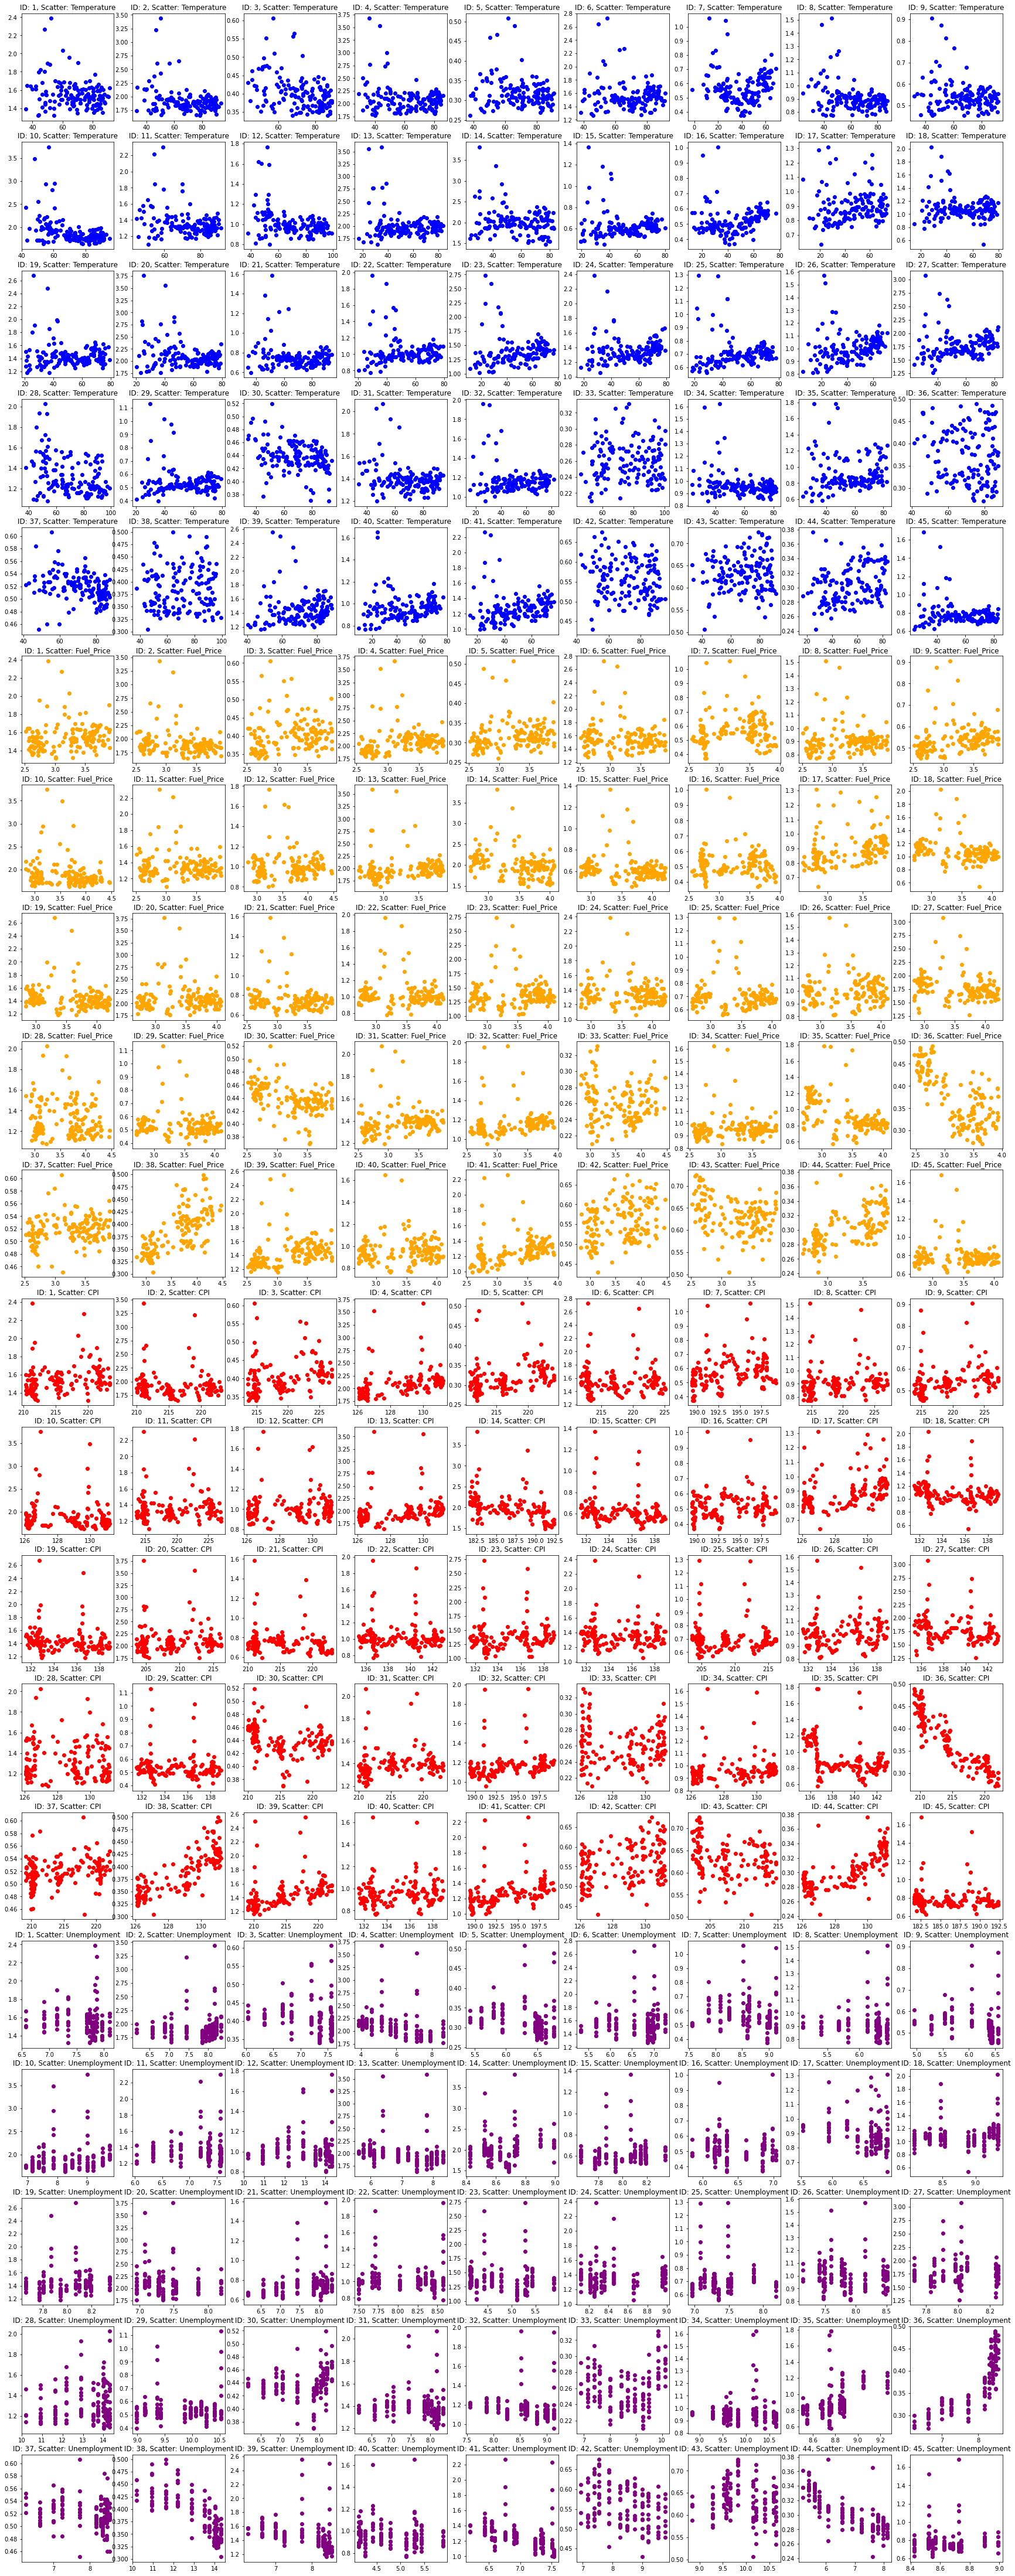

In [12]:
#Plotando Gráfico como Subplots - Definindo fig e axs
fig, axs = plt.subplots(20,9)
fig.set_figheight(80)
fig.set_figwidth(30)
index_s = 0
index_p = 0
index_c = 0
indicadores = ["Temperature","Fuel_Price","CPI","Unemployment"]
color = ["blue","orange","red","purple"]
for indicador in (indicadores):
    for loja in range(1,46):
        Dados = dft.loc[df["Store"]==loja,:]
        axs[index_p,index_s].scatter(Dados[indicador],Dados["Weekly_Sales"]/1000000, c=color[index_c]) # Weekly_Sales em Milhão
        axs[index_p,index_s].set_title(f"ID: {loja}, Scatter: {indicadores[index_c]}")
        if index_s == 8:
            index_s = 0
            index_p +=1
        else:
            index_s +=1
    index_c += 1
plt.show()

`DataFrame de Correlações`

Nesta seção será criado um DataFrame exclusivo para correlações das features com a target, a fim de distinguir atraves de grupos as relações que cada uma das features de cada loja têm com suas vendas semanais.
A fim de aprofundar 

Acima estão lotados 180 gráficos de dispersão, que apresentam o comportamento de cada variável pela Target, entre eles são:
- 45 Gráficos da Target pela Feature: Weekly_Sales
- 45 Gráficos da Target pela Feature: Fuel_Price
- 45 Gráficos da Target pela Feature: CPI
- 45 Gráficos da Target pela Feature: Unemployment

Para aprofundar cada gráfico foi criado um DataFrame com a correlação de cada uma dessas variáveis - havendo tamebm a divisão das mesmas em três grupos de correlação:

* Grupo 1 = Correlação Media/Forte Positiva
* Grupo 0 = Correlação Fraca (Seja Negativa/Positiva)
* Grupo -1 = Correlação Media/Forte Negativa

In [13]:
dft.Date = pd.to_datetime(dft.Date)
dfo = dft.sort_values(by="Date")
#Definindo Indicadores - Para Realizar Corr
indicadores = ["Temperature","Fuel_Price","CPI","Unemployment"]
target = "Weekly_Sales"
store = "Store"
#Criando DataFrame de Correlação das Features com Target
Correlation = correlacao(dfo,indicadores, target, store)
for indicador in indicadores:
    Correlation['Corr_' + indicador] = Correlation[indicador].apply(grupo)
#Checando DataFrame para Temperature
Correlation.head(5)

,Temperature,Fuel_Price,CPI,Unemployment,Corr_Temperature,Corr_Fuel_Price,Corr_CPI,Corr_Unemployment
1,-0.222701,0.124592,0.225408,-0.097955,0,0,0,0
2,-0.297673,-0.196375,-0.062431,0.066325,0,0,0,0
3,-0.377524,0.140886,0.317250,-0.230413,-1,0,1,0
4,-0.225583,0.211549,0.351157,-0.337015,0,0,1,-1
5,-0.175517,0.167352,0.308261,-0.207043,0,0,1,0


* Temperature

A media encontrada é de 0,133 que representa uma correlação positiva fraca. Porém, ao analisar o DataFrame de forma individual é possível averiguar que:

    - 7 Lojas pertencem ao Grupo: -1
    - 38 Lojas pertencem ao Grupo: 0
    - 0 Lojas pertencem oa Grupo: 1

O que indica que com o crescimento da temperatura externa das lojas as vendas semanais tendem a cair - havendo uma relação de proporcionalidade inversa

* Fuel_Price

A media encontrada é de -0,108 que representa uma correlação negativa fraca. Porém, ao analisar o DataFrame de forma individual é possível averiguar que:

    - 5 Lojas pertencem ao Grupo: -1
    - 35 Lojas pertencem ao Grupo: 0
    - 5 Lojas pertencem ao Grupo: 1

Mostrando que a variável têm relação media/forte em 10 lojas, porém não cria a mesma intensidade com o restante das lojas. Sendo assim não é possível afirmar que a Feature Fuel_Price influencia diretamente nas vendas semanais das lojas do Walmart.

* CPI


A media encontrada é de 0,133 que representa uma correlação positiva fraca. Porém, ao analisar o DataFrame de forma individual é possível averiguar que:

    - 3 Lojas pertencem ao Grupo: -1
    - 33 Lojas pertencem ao Grupo: 0
    - 9 Lojas pertencem ao Grupo: 1

O que indica que a grande maioria das lojas não demonstram grande correlação entre a Feature e Target, porém 9 lojas apresentam um aumento nas vendas - algo contra intuitivo, uma vez que, de acordo com a BBC UK, o crescimento da variável CPI (Consumer price index), índice utilizado para medir como a inflação impacta o consumidor final, causa redução no valor da moeda reduzindo o poder de compra.


* Unemployment

A media encontrada é de -0,088 que representa uma correlação negativa fraca. Porém, ao analisar o DataFrame de forma individual é possível averiguar que:

    - 6 Lojas pertencem ao Grupo: -1
    - 37 Lojas pertencem ao Grupo: 0
    - 2 Lojas pertencem ao Grupo: 1

O que indicia que a grande maioria das lojas não demonstram grande correlação entre a Feature e Target, porém 6 lojas indicam que o aumento na taxa de desemprego local causam quedas nas vendas.

____

### Construção da Base de Dados

* Preparando Base de Dados

In [14]:
Date = lista_datas()
Date_ = []
index1 = [0,0,0,0]
index2 = []
index3 = []
for e in range(len(Date)-1):
    if Date[e][-1] == "0":
        index1.append(Date[e])
    elif Date[e][-1] == "1":
        index2.append(Date[e])
    else:
        index3.append(Date[e])
Date_.append(index1)
Date_.append(index2)
Date_.append(index3)
print(f"Data Inicial: {Date_[0][4]}, Data Limite 2010: {Date_[0][-1]}")
print(f"Data Inicial 2011: {Date_[1][0]} Data Limite 2011: {Date_[1][-1]}")
print(f"Data Inicial 2012: {Date_[2][0]} Data Limite 2011: {Date_[2][-1]}")

Data Inicial: 05-02-2010, Data Limite 2010: 31-12-2010
Data Inicial 2011: 07-01-2011 Data Limite 2011: 30-12-2011
Data Inicial 2012: 06-01-2012 Data Limite 2011: 19-10-2012


In [15]:
# criando dataframes para os anos separadamente

data_2010 = dft.loc[dft["Date"] <= '31/12/2010']
data_2011 = dft.loc[dft["Date"] > '31/12/2010']
data_2011 = data_2011.loc[data_2011['Date'] <= '31/12/2011']
data_2012 = dft.loc[dft["Date"] > '31/12/2011']

In [16]:
WS_2010 = []
Temp_2010 = []
Fuel_2010 = []
CPI_2010 = []
Unemp_2010 = []

WS_2012 = []
Temp_2012 = []
Fuel_2012 = []
CPI_2012 = []
Unemp_2012 = []
for e in range(0,180):
    WS_2010.append(0)
    Temp_2010.append(0)
    Fuel_2010.append(0)
    CPI_2010.append(0)
    Unemp_2010.append(0)
for e in data_2010["Weekly_Sales"]:
    WS_2010.append(e)
for e in data_2010["Temperature"]:
    Temp_2010.append(e)
for e in data_2010["Fuel_Price"]:
    Fuel_2010.append(e)
for e in data_2010["CPI"]:
    CPI_2010.append(e)
for e in data_2010["Unemployment"]:
    Unemp_2010.append(e)

    

for e in data_2012["Weekly_Sales"]:
    WS_2012.append(e)
for e in data_2012["Temperature"]:
    Temp_2012.append(e)
for e in data_2012["Fuel_Price"]:
    Fuel_2012.append(e)
for e in data_2012["CPI"]:
    CPI_2012.append(e)
for e in data_2012["Unemployment"]:
    Unemp_2012.append(e)
for e in range (0,405):
    WS_2012.append(0)
    Temp_2012.append(0)
    Fuel_2012.append(0)
    CPI_2012.append(0)
    Unemp_2012.append(0)
    

DataT = pd.DataFrame()
DataT["Store ID"] = data_2011["Store"]
DataT["WS 2010"] = WS_2010
DataT["WS 2011"] = data_2011["Weekly_Sales"]
DataT["WS 2012"] = WS_2012
DataT["Temp 2010"] = Temp_2010
DataT["Temp 2011"] = data_2011["Temperature"]
DataT["Temp 2012"] = Temp_2012
DataT["Fuel 2010"] = Fuel_2010
DataT["Fuel 2011"] = data_2011["Fuel_Price"]
DataT["Fuel 2012"] = Fuel_2012
DataT["CPI 2010"] = CPI_2010
DataT["CPI 2011"] = data_2011["CPI"]
DataT["CPI 2012"] = CPI_2012
DataT["Unemp 2010"] = Unemp_2010
DataT["Unemp 2011"] = data_2011["Unemployment"]
DataT["Unemp 2012"] = Unemp_2012


Lista_X = []
Lista_Y = []
Lista_Z = []
Lista_M = []
Lista_N = []
Lista_Index = DataT["WS 2010"].index
for e in Lista_Index:
    if DataT["WS 2010"][e] == 0:
        x = (DataT["WS 2011"][e] + DataT["WS 2012"][e])/2
        y = (DataT["Temp 2011"][e] + DataT["Temp 2012"][e])/2
        z = (DataT["Fuel 2011"][e] + DataT["Fuel 2012"][e])/2
        m = (DataT["CPI 2011"][e] + DataT["CPI 2012"][e])/2
        n = (DataT["Unemp 2011"][e] + DataT["Unemp 2012"][e])/2
    elif DataT["WS 2012"][e] == 0:
        x = (DataT["WS 2010"][e] + DataT["WS 2011"][e])/2
        y = (DataT["Temp 2010"][e] + DataT["Temp 2011"][e])/2
        z = (DataT["Fuel 2010"][e] + DataT["Fuel 2011"][e])/2
        m = (DataT["CPI 2010"][e] + DataT["CPI 2011"][e])/2
        n = (DataT["Unemp 2010"][e] + DataT["Unemp 2011"][e])/2
    else:
        x = (DataT["WS 2010"][e] + DataT["WS 2011"][e] + DataT["WS 2012"][e])/3
        y = (DataT["Temp 2010"][e] + DataT["Temp 2012"][e]) + DataT["Temp 2011"][e]/3
        z = (DataT["Fuel 2010"][e] + DataT["Fuel 2012"][e]) + DataT["Fuel 2011"][e]/3
        m = (DataT["CPI 2010"][e] + DataT["CPI 2012"][e]) + DataT["CPI 2011"][e]/3
        n = (DataT["Unemp 2010"][e] + DataT["Unemp 2012"][e]) + DataT["Unemp 2011"][e]/3
    Lista_X.append(x)
    Lista_Y.append(y)
    Lista_Z.append(z)
    Lista_M.append(m)
    Lista_N.append(n)
    
    
Average = pd.DataFrame()
Average["Store ID"] = data_2011["Store"]
Average["Avr WS"] = Lista_X
Average["Avr Temp"] = Lista_Y
Average["Avr Fuel"] = Lista_Z
Average["Avr CPI"] = Lista_M
Average["Avr Unemp"] = Lista_N
Average.head(5)

,Store ID,Avr WS,Avr Temp,Avr Fuel,Avr CPI,Avr Unemp
48,1,1497551.100,48.640,3.0665,215.559500,7.545
49,1,1425307.565,41.965,3.1220,215.674969,7.545
50,1,1360899.630,49.075,3.1420,215.906462,7.545
51,1,1318112.450,49.045,3.1500,216.137955,7.545
52,1,1621484.615,49.410,3.1745,216.369448,7.545


* Agrupando as correlações por grupo

In [17]:
indicadores = ["Avr Temp","Avr Fuel", "Avr CPI", "Avr Unemp"]
target = "Avr WS"
store = "Store ID"
Average_Corr = correlacao(Average, indicadores, target, store)
Average_Corr

,Avr Temp,Avr Fuel,Avr CPI,Avr Unemp
1,-0.385470,-0.150815,0.253445,0.058035
2,0.312047,0.484127,-0.707416,0.346999
3,-0.483220,-0.067440,-0.991568,-0.966945
4,-0.536774,-0.585373,-0.630713,-0.605734
5,0.163041,0.418692,0.203006,0.193056
6,-0.708260,-0.064903,-0.171687,0.405203
7,0.357541,-0.163539,-0.938420,-0.008278
8,-0.055858,-0.046117,-0.842211,0.583632
9,-0.170990,0.313271,0.020394,0.021282
10,-0.562863,-0.571562,0.185462,-0.729254


* Apresentação da Base de Dados

In [18]:
Average

,Store ID,Avr WS,Avr Temp,Avr Fuel,Avr CPI,Avr Unemp
48,1,1497551.100,48.640,3.0665,215.559500,7.5450
49,1,1425307.565,41.965,3.1220,215.674969,7.5450
50,1,1360899.630,49.075,3.1420,215.906462,7.5450
51,1,1318112.450,49.045,3.1500,216.137955,7.5450
52,1,1621484.615,49.410,3.1745,216.369448,7.5450
...,...,...,...,...,...,...
6387,45,877472.355,45.560,3.2490,185.585025,8.6235
6388,45,979759.825,38.555,3.2620,185.603211,8.6235
6389,45,1101094.265,35.220,3.2765,185.657833,8.6235
6390,45,1602410.010,36.430,3.2650,185.737283,8.6235


In [19]:
X = Average[['Avr Temp', 'Avr Fuel', 'Avr CPI', 'Avr Unemp']]
Y = Average['Avr WS']

____
### Scikit-Learn
#### Informações sobre biblioteca

Scikit-Learn ou SkLearn é uma biblioteca criada em 2007 por David Cournapeau disponível nas seguintes linguagens de programação:

    - Python
    - Sython
    - C
    - C++

Com grande enfoque na criação, atraves do uso de Machine Learning, de modelos classificatórios e regressivos, utilizando mais de 20 técnicas como: Linear Regression, Logistic Regression, Quantile Regression, Polynomial Regression. Empregando ferramentas de observação e analise de dados como Clustering, Dimensionality Reduction, Model Selection e Preprocessing.

Esta biblioteca dispõe de ferramentas simples e eficientes para análise preditiva de dados, é reutilizável em diferentes situações, possui código aberto, sendo acessível a todos e foi construída sobre os pacotes NumPy, SciPy e matplotilib.

A biblioteca possui varias bibliotecas e pacotes, dentre eles, temos o NumPy e o Pandas como os principais para a preparação dos dados, e o scikit-learn, ou apenas sklearn, sendo o mais utilizado para efetiva criação de modelos de machine learning.

#### Principais aplicações

* Pré-processamento: 
    
    É a parte mais difícil na implementação de um modelo. Temos o Numpy e o Pandas, muito utilizados normalmente esta é a etapa mais trabalhosa no desenvolvimento de um modelo de machine learning. O NumPy e o Pandas são largamente utilizados nesta etapa, mas, para a alegria de todo desenvolvedor, temos outra opção, a biblioteca sklearn também tem funções para esta finalidade, feitos justamente para implementar modelos de machine learnig.
    

* Classificação:


    Aqui entra a parte do desenvolvimento de modelos, temos uma gama de possibilidades. Podemos classificar grupos, predizer se vou ter determinada doença ou não, dentre outras possibilidades.


* Regressão:


    Aqui entra a predição de modelos continuos, nos permite prever as vendas de uma empresa (é o que estamos fazendo neste trabalho), nos permite predizer o volume de chuva em um determinado periodo entre tantas outras possibilidades.


* Clusterização: 


    Desenvolvimento de modelos para detecção automática de grupos com características similares em seus integrantes. Podemos identificar clientes com comportamentos parecidos, grupos de risco de determinada doença, verificar padrões entre moradores de uma cidade, e muitos outros agrupamentos.


* Redução de dimencionalidade: 


    Reduzir o número de variáveis em um problema. Com esta redução podemos diminuir consideravelmente a quantidade de cálculos necessários em um modelo, aumentando a eficiência, com uma perde mínima de assertividade.


* Ajuste de parâmetros: 


    Comparar, validar e escolher parâmetros e modelos, de maneira automatizada. Podemos facilmente comparar diferentes parâmetros no ajuste de um modelo, encontrando assim a melhor configuração para a aplicação em questão.

Para este projeto serão utilizados os modelos regressivo:

    - Linear Regression
    - Decision Tree Regressor
    - Random Forest Regressor

Em conjunto com indicadores qualitativos que apresentam a precisão de cada modelo, taxa de erro médio e predição futura.

#### Machine Learning

<img src="img/machine_learning.png" width=75%>


Machine Learning é um campo da ciencia dos dados que foca no aprendizado automatico por parte do computador, havendo, apenas, a necessidade de se optar por um método supervisionado - podendo este ser modelos de regressão ou classificação e a necessidade de se dividir de maneira randômica uma base de dados em treinamento e teste - não existindo um valor exato para a divisão, uma vez que cada modelo terá o seu ponto de equilíbrio (ponto, no qual há maior eficácia do modelo).

Que serão utilizados exclusivamente para a maquina treinar excessivamente (para todos os dados disponíveis) tentando encontrar qual a melhor forma de se solucionar um problema - ou no caso da regressão linear, por exemplo, encontrar a reta que melhor satisfaz a necessidade de correlação entre as Features e a Target.

Uma vez encontrado este modelo será aplicado ao restante da base de dados (Teste), e onde a partir das predições, modelos ou pontos encontrados há a possíbilidade de se utilizar indicadores como `mean_squared_error` ou `r2_score` para se averiguar a taxa de acerto do sistema e assim partir para a predição final dos dados.

Essa técnica permite o modelo aprender com os dados antes de ser implementado na pratica, a medida que ele treina (aprende) se aperfeiçoa cada vez mais. Contextualizando o quão bom é a técnica, tomemos o seguinte exemplo:
    
    A NASA enviou um satelite ao espaço com o intuito de descobrir exoplanetas para ser a possível nova Terra, nossa nova casa, afinal o Sol está morrendo, temos apenas 5 milhões de anos (pode ficar despreocupado rsrsrs). Nesse satelite, envia uma quantidade gigantesca de dados todos os dias, cerca de 7 terabites de dados diariamente, é muito dado para analizar. Antigamente, usava-se GPU e TPU para o processamento, levando cerca de 33h para comfirmar a existencia de um explaneta. Com o uso da inteligencia artificial, treinando o modelo com imagens do que realmente é um exoplaneta, chegou-se a marca de 1min e 30s. Ufaaa, desse jeito vamos analizar cada vez mais dados e poderemos nos mudar de planeta quando precisar.
    
    Situações como essa, descritas acima, são um pequeno exemplo do poder da técnica de machine learing. E neste projeto vamos usar essa tecnica maravilhosa para prever as vendas semanais da rede Walmart, agora sim o gerente vai ficar feliz.

#### Data Mining

Data mining ou mineração de dados é um processo pelo qual um computador ou algoritmo extraem, descobrem e analisam dados/padrões em um DataSet, envolvendo Machine Learning, estatística e sistema de base de dados. Sendo um dos pilares fundamentais para modelos de regressão avançados - como os utilizados modelos de Random Fores Regressor e Decision Tree Regressor.
Algumas das tarefas envolvidas em minerar dados é:

- Detecção de Anomalias
- Association Rule Learning
- Clustering
- Classificação
- Regressão
- Sumarização

Sendo todas elas conectadas a forma, pela qual os dados são identificados, conectados, correlacionados, estruturados, preditos, agrupados e apresentados.

Uma exemplificação deste processo está representado na imagem abaixo, na qual cada figura representa:

- Figura 1: Analise e Clusterização
- Figura 2: Generalização
- Figura 3: Classificação
- Figura 4: Dependência

<img src="img/data-mining.png" width=75%>

a primeiro figura representa a etapa de analise e Clusterização, a segunda figura a etapa 

#### Linear Regression - Modelo 1

<img src="img/ilustracao_linear.png" width=75%>

O primeiro modelo utilizado será o de regressão linear que têm objetivo predizer uma variável Target, através da construção de um modelo teste baseado na correlação das variáveis secundarias (Features) com a variável principal Target.

Como foi colocado acima, este modelo faz o uso de Machine Learning para, atraves dos dados de treinamento, descobrir qual o comportamento de cada Feature pela Target, qual a influencia deste comportamento no crescimento ou decressimo de ambas as variáveis - e como, com visão macro, este comportamento pode ser previsto através da realização de um modelo. 

Para isso é utilizado um metodo de Hipotese chamado de Sistema de Hipoteses da Regressão Linear, representado pela função abaixo:

<center>$Y = Θ_{1} + Θ_{2}*X$</center>

Neste sistema de hipotese a maquina ira testar individualmente qual a reta que melhor se encaixa no comportamento das Features pela Target, resultando na geração de um regressão linear ou reta linear simples, que dará a possíbilidade de predizer dados futuros atraves de todos os comportamentos analisados.

A imagem colocada no inicio desta seção representa o trabalho de um algoritmo em encontrar qual a melhor reta perante diversos pontos dispersos no gráfico.

Comos todos os modelos, este têm beneficios aparentes, por ser um modelo extremamente simples, uma vez que trata todas as variaveis de forma linear. Porém existe um grande Upside, uma vez que, teoricamente, não é um modelo totalmente preciso quando comparado a outros de maior complexidade.

#### Decision Tree Regressor - Modelo 2

O segundo metodo utilizado é o Decision Tree Regressor, um metodo extremamente comum para predições comportamentais (qualitativas) e quantitativas, funcionando a partir da criação de uma arvore de variáveis.

A arvore têm inicio com uma semente chamada de Root Node que contém todas as Features e Target do Dataset. Essa Node inicial vai ser dividida em Nodes individuais que contém todas as Features separadas da Target - esta Node é chamada de Interior Node, e pode ser dividida mais vezes em Leaf Nodes.

Leaf Nodes por sua vez são Nodes de consequência ou Outcome que podem representar, por exemplo, um valor booleano, ou no caso deste projeto representa se a Weekly_Sales irá subir ou descer baseado nas features que estão no Interior Node.

<img src="img/ilustracao_dados_treeregression.png" width=75%>

A imagem acima apresenta um exemplo de como esta separação por Nodes funciona. E a imagem abaixo, apresenta como este modelo analisa dados de forma gráfico - algo que não será aprofundado neste projeto.

<img src="img/ilustracao_grafico_treeregression.png" width=75%>

Igual ao modelo de regressão linear, o modelo de decisão em arvore têm que ser treinando para conseguir se adaptar ao Dataset colocado e as suas condições únicas - para assim saber como a variância das features pode alterar o Outcome da Target.


===== BENEFICIOS E MALEFICIOS

#### Random Forest Regressor - Modelo 3

<img src="img/ilustracao_diagrama_randomforest.png" width=75%>

===== BENEFICIOS E MALEFICIOS

____
### Construção do Modelo

* Dados de Treinamento e Teste

In [20]:
X = Average[['Avr Temp', 'Avr Fuel', 'Avr CPI', 'Avr Unemp']]
Y = Average['Avr WS']

# vetores que receberam as informações separadas por lojas
Xi = []
Yi = []
# percorrendo loja a loja, temos:
# vamos utilizar a base de teste com um size de 18%
for loja in range(1,46):
    dff = Average.loc[Average['Store ID'] == loja, :]
    x = dff[['Avr Temp','Avr Fuel','Avr CPI','Avr Unemp']]
    y = dff['Avr WS']
    X_train,X_test,y_train,y_test=train_test_split(x,y, random_state=42,test_size=0.18)
    Xi.append([X_train,X_test])
    Yi.append([y_train,y_test])

____
### Regressão Linear - Modelo 1
Para a construção deste modelo não há a necessidade de separar a base de dados em Treinamento e teste, uma vez que essa ação já foi realizada na seção `Construção do Modelo`.
Havendo apenas a necessidade de chamar os dados representados por:

- <b>Xi[loja][0]</b> = X de treinamento para uma dada loja;
- <b>Xi[loja][1]</b> = X de teste para uma dada loja;
- <b>Yi[loja][0]</b> = Y de treinamento para uma dada loja;
- <b>Yi[loja][1]</b> = Y de teste para uma dada loja.

onde "loja" é o ID loja-1, deste modo, variando de 0 a 44.

In [21]:
#==== Banco de Variaveis e Resultados ====
#Tipos de Score
maior_score_test = 0
melhor_id_loja   = 0
pior_score_test  = 1 # pq esse é maior dado, dai sera menor que todos os dados analizamos
pior_id_loja     = 0
lojas_alpha_maior_90 = []
#Informações Unitarias (Cada Store ID)
Coef_Reg = []
Mean_Squared = []
R_Squared = []
#Predição
Y_Prediction = []
Y_Train = []


for loja in range(0,45): 
    #==== Criando Variaveis e Objetos ====
    regr = linear_model.LinearRegression()
    
    #=== Treinamento do Modelo ====
    # Treinamento Modelo - Usando X_Train e Y_Train
    regr.fit(Xi[loja][0], Yi[loja][0])
    # Predição de Y - Usando X_Test
    sales_y_pred = regr.predict(Xi[loja][1])
    Y_Prediction.append(sales_y_pred)

    #Create linear regression object
    score_train = regr.score(Xi[loja][0], Yi[loja][0])
    score_test = regr.score(Xi[loja][1], Yi[loja][1])
    
    #==== Coletando Informações Sobre Modelo ====
    #Coletando diferentes tipos de Score:
    if score_test > maior_score_test:
        maior_score_test = score_test
        melhor_id_loja = loja + 1 #Adição é realizada por materia de Index e Apresentação
    if score_test < pior_score_test:
        pior_score_test = score_test
        pior_id_loja = loja + 1 #Adição é realizada por materia de Index e Apresentação
    if score_test >= 0.9:
        lojas_alpha_maior_90.append(loja+1)
    #Coeficiente de regressão
    const = [regr.intercept_]
    const.extend(regr.coef_) #.extend = Extender lista para adicionar const ao inicio
    Coef_Reg.append(const)
    
    #Média Quadratica
    m = mean_squared_error(Yi[loja][1], sales_y_pred)
    Mean_Squared.append(m)
    #R Quadrado
    r = r2_score(Yi[loja][1], sales_y_pred)
    R_Squared.append(r)
    
    
print(f'A loja com o maior score de test foi {melhor_id_loja}, cujo score foi de {maior_score_test}')
print(f'A loja com o pior score de test foi {pior_id_loja}, cujo score foi de {pior_score_test}')
print(f'As lojas cujo score foi maior ou igual a 90% foram: {lojas_alpha_maior_90}')

A loja com o maior score de test foi 3, cujo score foi de 0.9928805898614836
A loja com o pior score de test foi 29, cujo score foi de -0.8385025740321539
As lojas cujo score foi maior ou igual a 90% foram: [3, 28, 30, 36, 37, 38, 42]


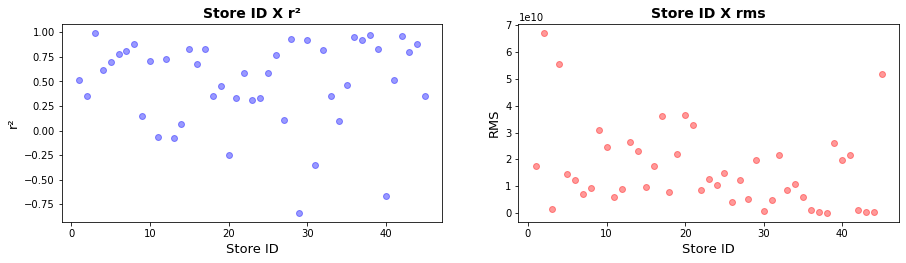

In [22]:
st = np.arange(1,46,1)
plt.figure(figsize=(15,8))

plt.subplot(221)
plt.scatter(st, R_Squared,c='blue', alpha=0.4)
plt.title('Store ID X r²', fontsize= 14, fontweight = 600)
plt.xlabel('Store ID', fontsize=13)
plt.ylabel('r²', fontsize=13)

plt.subplot(222)
plt.scatter(st, Mean_Squared,c='red', alpha=0.4)
plt.title('Store ID X rms', fontsize= 14, fontweight=600)
plt.xlabel('Store ID', fontsize=13)
plt.ylabel('RMS', fontsize=13)
plt.show()

____
### Decision Tree Regressor - Modelo 2

Para a construção deste modelo não há a necessidade de separar a base de dados em Treinamento e teste, uma vez que essa ação já foi realizada na seção `Construção do Modelo`.
Havendo apenas a necessidade de chamar os dados representados por:

- <b>Xi[loja][0]</b> = X de treinamento para uma dada loja;
- <b>Xi[loja][1]</b> = X de teste para uma dada loja;
- <b>Yi[loja][0]</b> = Y de treinamento para uma dada loja;
- <b>Yi[loja][1]</b> = Y de teste para uma dada loja.

onde "loja" é o ID loja-1, deste modo, variando de 0 a 44.

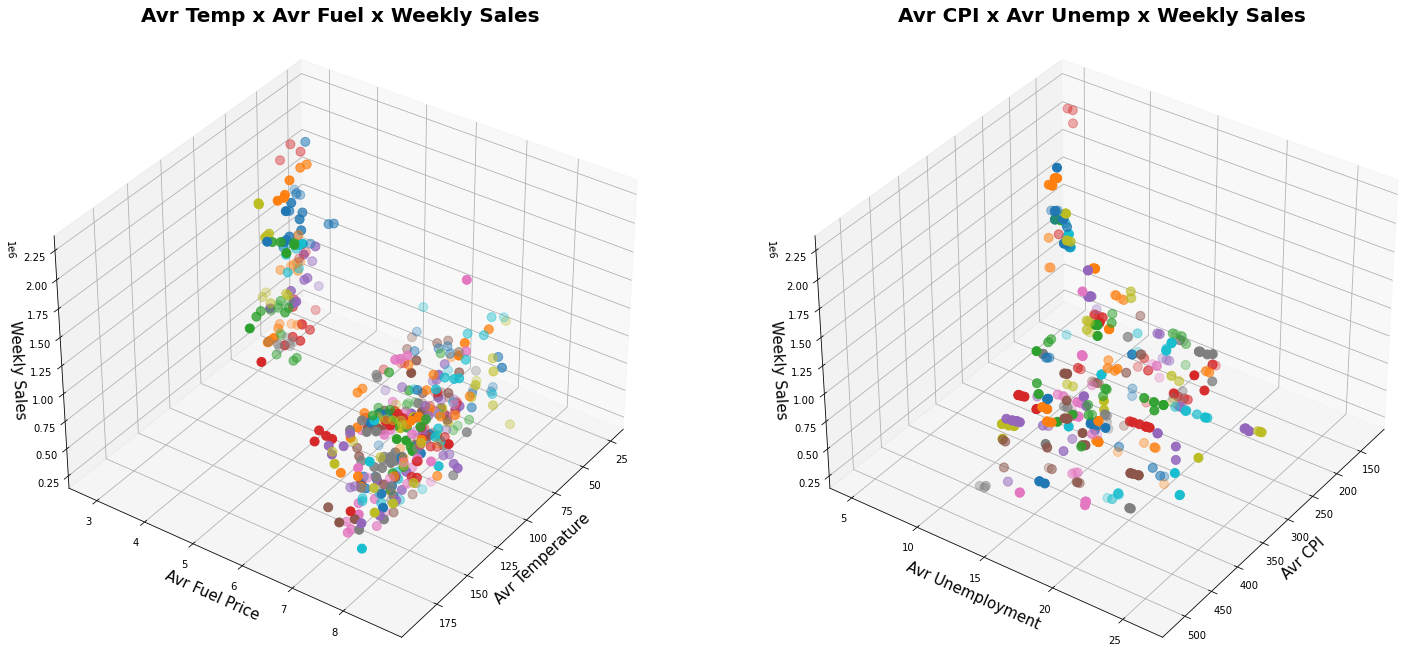

In [23]:
#==== Banco de Variaveis e Resultados ====
#Informações unitarias (Cada Store ID)
Coef_Reg2 = []
Mean_Squared2 = []
R_Squared2 = []
#Predição
Y_Prediction2 = []
fig = plt.figure(figsize=(25,16))
ax = fig.add_subplot(121,projection="3d")
ax2 = fig.add_subplot(122,projection="3d")
ax.set_xlabel("Avr Temperature", fontsize=15)
ax.set_ylabel("Avr Fuel Price", fontsize=15)
ax.set_zlabel("Weekly Sales",fontsize=15)
ax.view_init(35,35)
ax.set_title("Avr Temp x Avr Fuel x Weekly Sales",fontsize=20, fontweight=750)
ax2.set_xlabel("Avr CPI",fontsize=15)
ax2.set_ylabel("Avr Unemployment",fontsize=15)
ax2.set_zlabel("Weekly Sales",fontsize=15)
ax2.view_init(35,35)
ax2.set_title("Avr CPI x Avr Unemp x Weekly Sales",fontsize=20, fontweight=750)

for loja in range(0,45):
    #==== Criando Variaveis e Objetos ====
    # Regrassão 2 - TreeRegressor
    regr_1 = DecisionTreeRegressor(max_depth=2)
    regr_1.fit(Xi[loja][0], Yi[loja][0]) #Dados de Treinamento
    # Previsão
    sales_y_pred2 = regr_1.predict(Xi[loja][1])
    Y_Prediction2.append(sales_y_pred2)
    
    #Coeficiente de regressão
    const2 = [regr.intercept_]
    const2.extend(regr.coef_)
    Coef_Reg2.append(const)
    
    #Média Quadratica
    m2 = mean_squared_error(Yi[loja][1], sales_y_pred2)
    Mean_Squared2.append(m2)
    #R Quadrado
    r2 = r2_score(Yi[loja][1], sales_y_pred2)
    R_Squared2.append(r2)
    
    #Plot Gráfico 3D - Avr's Temp, Fuel, CPI, Unemp x Weekly_Sales
    ax.scatter3D(Xi[loja][1]["Avr Temp"],Xi[loja][1]["Avr Fuel"],sales_y_pred2,s=80) 
    ax2.scatter3D(Xi[loja][1]["Avr CPI"],Xi[loja][1]["Avr Unemp"],sales_y_pred2,s=80)  
plt.show()

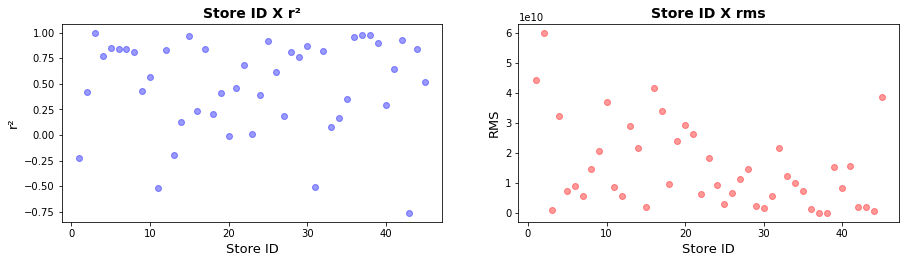

In [24]:
plt.figure(figsize=(15,8))

plt.subplot(221)
plt.scatter(st, R_Squared2,c='blue', alpha=0.4)
plt.title('Store ID X r²', fontsize= 14, fontweight = 600)
plt.xlabel('Store ID', fontsize=13)
plt.ylabel('r²', fontsize=13)

plt.subplot(222)
plt.scatter(st, Mean_Squared2,c='red', alpha=0.4)
plt.title('Store ID X rms', fontsize= 14, fontweight = 600)
plt.xlabel('Store ID', fontsize=13)
plt.ylabel('RMS', fontsize=13)
plt.show()

____
### Random Tree Regressor - Modelo 3
Para a construção deste modelo não há a necessidade de separar a base de dados em Treinamento e teste, uma vez que essa ação já foi realizada na seção `Construção do Modelo`.
Havendo apenas a necessidade de chamar os dados representados por:

- <b>Xi[loja][0]</b> = X de treinamento para uma dada loja;
- <b>Xi[loja][1]</b> = X de teste para uma dada loja;
- <b>Yi[loja][0]</b> = Y de treinamento para uma dada loja;
- <b>Yi[loja][1]</b> = Y de teste para uma dada loja.

onde "loja" é o ID loja-1, deste modo, variando de 0 a 44.

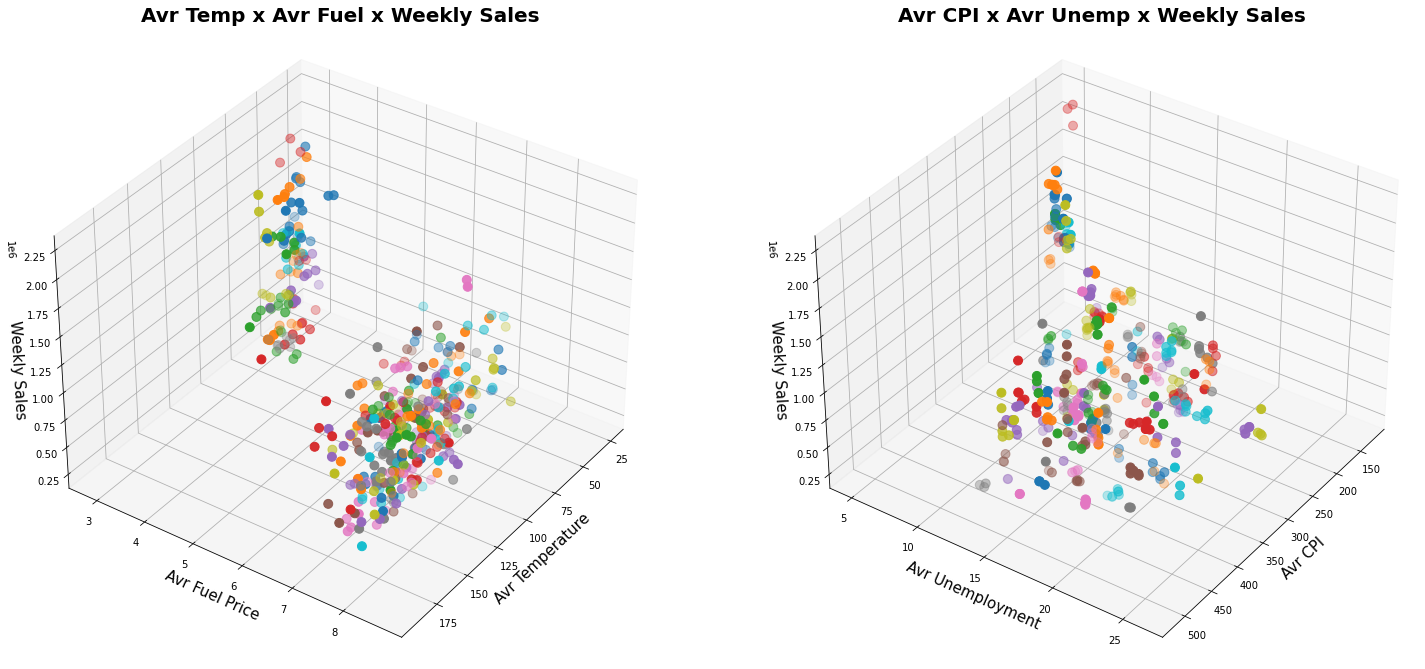

In [25]:
#==== Banco de Variaveis e Resultados ====
#Informações unitarias (Cada Store ID)
Coef_Reg3 = []
Mean_Squared3 = []
R_Squared3 = []
#Predição
Y_Prediction3 = []
fig = plt.figure(figsize=(25,16))
ax3 = fig.add_subplot(121,projection="3d")
ax4 = fig.add_subplot(122,projection="3d")
ax3.set_xlabel("Avr Temperature", fontsize=15)
ax3.set_ylabel("Avr Fuel Price", fontsize=15)
ax3.set_zlabel("Weekly Sales",fontsize=15)
ax3.view_init(35,35)
ax3.set_title("Avr Temp x Avr Fuel x Weekly Sales",fontsize=20, fontweight=750)
ax4.set_xlabel("Avr CPI",fontsize=15)
ax4.set_ylabel("Avr Unemployment",fontsize=15)
ax4.set_zlabel("Weekly Sales",fontsize=15)
ax4.view_init(35,35)
ax4.set_title("Avr CPI x Avr Unemp x Weekly Sales",fontsize=20, fontweight=750)

for loja in range(0,45):
    #==== Criando Variaveis e Objetos ====
    # Regrassão 2 - TreeRegressor
    regr_2 = DecisionTreeRegressor(random_state=0)
    regr_2.fit(Xi[loja][0], Yi[loja][0]) #Dados de Treinamento
    # Previsão
    sales_y_pred3 = regr_2.predict(Xi[loja][1])
    Y_Prediction3.append(sales_y_pred3)
    
    #Coeficiente de regressão
    const3 = [regr.intercept_]
    const3.extend(regr.coef_)
    Coef_Reg3.append(const)
    
    #Média Quadratica
    m3 = mean_squared_error(Yi[loja][1], sales_y_pred3)
    Mean_Squared3.append(m3)
    #R Quadrado
    r3 = r2_score(Yi[loja][1], sales_y_pred3)
    R_Squared3.append(r3)
    
    
    ax3.scatter3D(Xi[loja][1]["Avr Temp"],Xi[loja][1]["Avr Fuel"],sales_y_pred3,s=80) 
    ax4.scatter3D(Xi[loja][1]["Avr CPI"],Xi[loja][1]["Avr Unemp"],sales_y_pred3,s=80)  
plt.show()

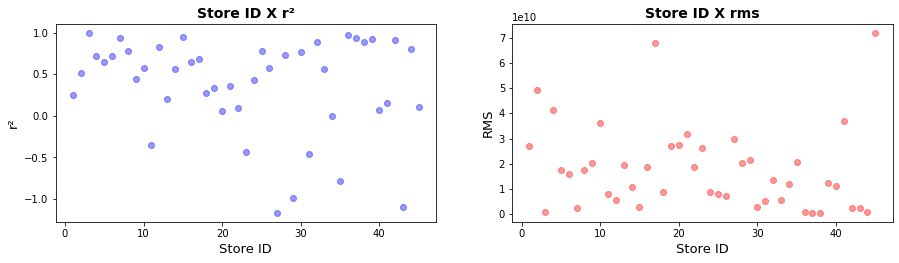

In [26]:
plt.figure(figsize=(15,8))

plt.subplot(221)
plt.scatter(st, R_Squared3,c='blue', alpha=0.4)
plt.title('Store ID X r²', fontsize= 14, fontweight = 600)
plt.xlabel('Store ID', fontsize=13)
plt.ylabel('r²', fontsize=13)

plt.subplot(222)
plt.scatter(st, Mean_Squared3,c='red', alpha=0.4)
plt.title('Store ID X rms', fontsize=14, fontweight=600)
plt.xlabel('Store ID', fontsize=13)
plt.ylabel('RMS', fontsize=13)
plt.show()

### Analise dos Modelos

#### Sobreposição de r²

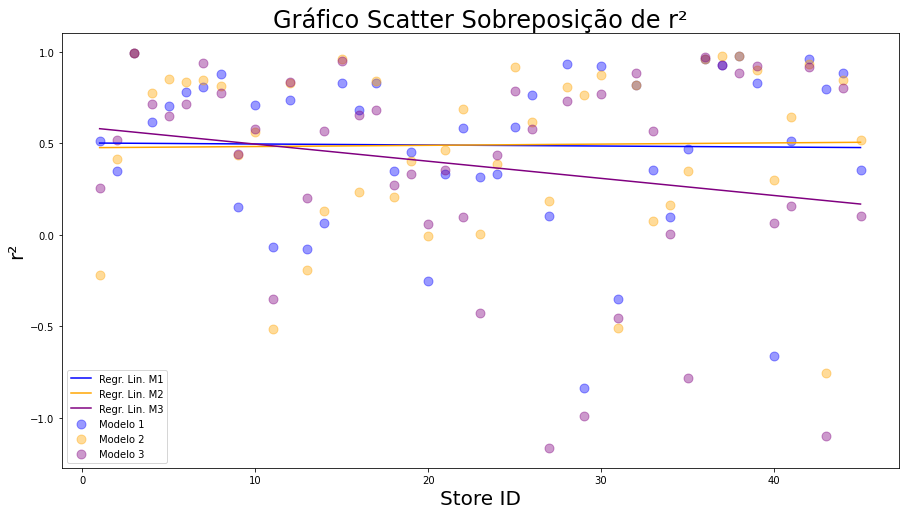

In [27]:
plt.figure(figsize=(15,8))
plt.scatter(st,R_Squared, c="blue", alpha = 0.4, label="Modelo 1", s=80)
b , m = polyfit(st, R_Squared,1)
plt.plot(st, b+m*st,"-", c="blue", label=("Regr. Lin. M1"))
plt.scatter(st,R_Squared2, c="orange", alpha = 0.4, label="Modelo 2", s=80)
b2 , m2 = polyfit(st, R_Squared2,1)
plt.plot(st, b2+m2*st,"-", c="orange", label=("Regr. Lin. M2"))
plt.scatter(st,R_Squared3, c="purple", alpha = 0.4, label="Modelo 3",s=80)
b3 , m3 = polyfit(st, R_Squared3,1)
plt.plot(st, b3+m3*st,"-", c="purple", label=("Regr. Lin. M3"))
plt.title("Gráfico Scatter Sobreposição de r²", fontsize=24)
plt.xlabel("Store ID",fontsize=20)
plt.ylabel("r²", fontsize=20)
plt.legend()
plt.show()

#### Sobreposição de rms

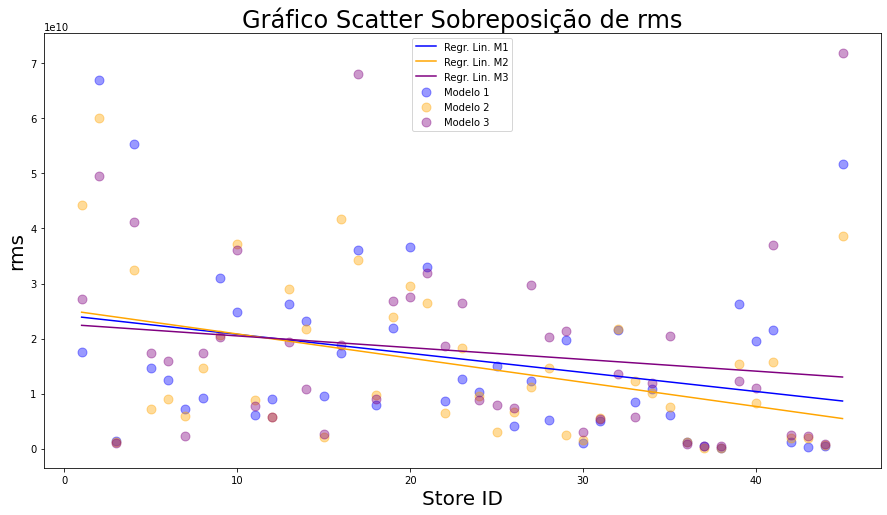

In [28]:
plt.figure(figsize=(15,8))
plt.scatter(st,Mean_Squared, c="blue", alpha = 0.4, label="Modelo 1", s=80)
b , m = polyfit(st, Mean_Squared,1)
plt.plot(st, b+m*st,"-", c="blue", label=("Regr. Lin. M1"))
plt.scatter(st,Mean_Squared2, c="orange", alpha = 0.4, label="Modelo 2", s=80)
b2 , m2 = polyfit(st, Mean_Squared2,1)
plt.plot(st, b2+m2*st,"-", c="orange", label=("Regr. Lin. M2"))
plt.scatter(st,Mean_Squared3, c="purple", alpha = 0.4, label="Modelo 3",s=80)
b3 , m3 = polyfit(st, Mean_Squared3,1)
plt.plot(st, b3+m3*st,"-", c="purple", label=("Regr. Lin. M3"))
plt.title("Gráfico Scatter Sobreposição de rms", fontsize=24)
plt.xlabel("Store ID",fontsize=20)
plt.ylabel("rms", fontsize=20)
plt.legend()
plt.show()

#### Entrelaçado

#### Referências 

https://scikit-learn.org/stable/modules/linear_model.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

https://medium.com/pursuitnotes/decision-tree-regression-in-6-steps-with-python-1a1c5aa2ee16

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

https://ensinandomaquinasblog.wordpress.com/2017/12/15/modelos-preditivos-de-notas-de-redacao-do-enem-2015/

https://scikit-learn.org/stable/modules/tree.html

https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html#sphx-glr-auto-examples-tree-plot-tree-regression-py

https://pt.wikipedia.org/wiki/Walmart

https://www.geeksforgeeks.org/ml-linear-regression/

https://www.mathworks.com/discovery/machine-learning.html

https://pt.wikipedia.org/wiki/Aprendizado_de_máquina

https://didatica.tech/a-biblioteca-scikit-learn-pyhton-para-machine-learning/

https://www.ibm.com/br-pt/analytics/machine-learning
